In [1]:
!pip install --quiet git+https://github.com/atagade/lucent

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
import torch
import urllib.request 
import numpy as np
import collections
from functools import partial
from PIL import Image
from lucent.modelzoo import custom_resnet
from lucent.optvis import objectives, transform, param, render
from lucent.optvis.render import hook_model

In [3]:
import csv

output = []

with open('results/resnet50_23_06_04_11_39/descriptions.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for i, row in enumerate(reader):
        if i == 0:
            continue
        output.append(row)      

In [4]:
import numpy as np

similarities = torch.tensor(np.asarray(output)[:,3].astype(float))

In [5]:
(similarities == similarities.max()).nonzero()

tensor([[3104]])

In [7]:
output[3104]

['layer4', '1248', 'washer, automatic washer, washing machine', '7.5985413']

100%|██████████| 512/512 [00:10<00:00, 50.22it/s]



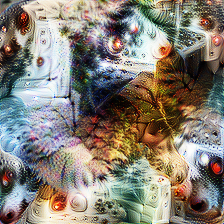

In [8]:
import torch
import torchvision

device = 'cuda' if torch.cuda.is_available else 'cpu'

model = torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights.IMAGENET1K_V1).to(device).eval()

param_f = lambda: param.image(224)

obj = objectives.channel(output[3104][0], int(output[3104][1]))

_ = render.render_vis(model, obj, param_f, preprocess = True, show_inline = True, thresholds=(512,))

In [9]:
concept_indices = similarities.topk(similarities[similarities > 0.6].shape[0]).indices
layer3_outputs = np.asarray(output)[np.asarray(output)[:,0].astype(str) == 'layer3']
layer3_similarities = torch.tensor(layer3_outputs[:,3].astype(float))

concept_indices = layer3_similarities.topk(5).indices

bicycle-built-for-two, tandem bicycle, tandem : 6.868927 layer3 - 774


100%|██████████| 512/512 [00:07<00:00, 64.94it/s]



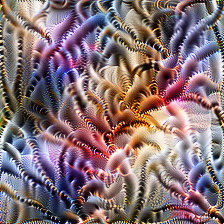

refrigerator, icebox : 6.8403625 layer3 - 277


100%|██████████| 512/512 [00:08<00:00, 62.69it/s]



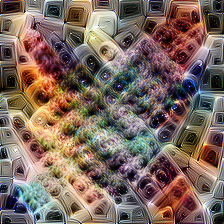

waffle iron : 6.6624146 layer3 - 557


100%|██████████| 512/512 [00:08<00:00, 62.18it/s]



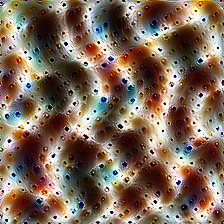

warplane, military plane : 6.5247498 layer3 - 976


100%|██████████| 512/512 [00:08<00:00, 61.81it/s]



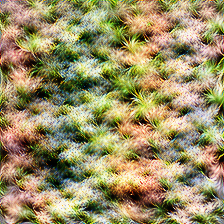

spider web, spider's web : 6.416565 layer3 - 188


100%|██████████| 512/512 [00:08<00:00, 61.19it/s]



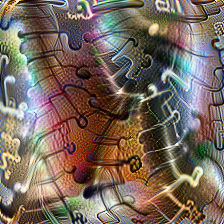

In [10]:
for index in concept_indices:
    print(f"{layer3_outputs[index][2]} : {layer3_outputs[index][3]} {layer3_outputs[index][0]} - {layer3_outputs[index][1]}")

    param_f = lambda: param.image(224)

    obj = objectives.channel(layer3_outputs[index][0], int(layer3_outputs[index][1]))

    _ = render.render_vis(model, obj, param_f, preprocess = True, show_inline = True, thresholds=(512,))    

100%|██████████| 512/512 [00:09<00:00, 55.77it/s]



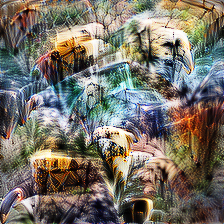

In [15]:
from lucent.optvis import objectives, transform, param, render
from lucent.optvis.render import hook_model

param_f = lambda: param.image(224)

obj = objectives.channel('layer4', 63)

_ = render.render_vis(model, obj, param_f, preprocess = True, show_inline = True, thresholds=(512,))